In [1]:
import pathlib
import numpy as np
import scipy as sp
import pickle
import pandas as pd
from matplotlib import pyplot as plt

import SessionTools.two_photon as st2p 
import NeuromodPlasticity as nmp

plt.rcParams['pdf.fonttype']=42

%load_ext autoreload
%autoreload 2 


%matplotlib inline

In [2]:
pkldir = '/media/mplitt/SSD_storage/2P_scratch/DTE_EL_EPG_dual_color/PreProcDat'

with open(pkldir, 'rb') as f:
    data = pickle.load(f)

In [3]:
def print_nested_keys(data, indent=0):
    """Recursively prints the keys of a nested dictionary."""
    if isinstance(data, dict):
        for key, value in data.items():
           print("  " * indent + str(key))  # Print the key with indentation 
           print_nested_keys(value, indent + 1) 

In [4]:
print_nested_keys(data)

C:\Users\turnerevansd\Documents\Data\G60D05RSS27\20180412\Fly4_3-4day_6fx60D05_jRGCx27_All
  C:\Users\turnerevansd\Documents\Data\G60D05RSS27\20180412\Fly4_3-4day_6fx60D05_jRGCx27_All_00001.tif
    trialName
    meanMIP
    EBOutline
    allROIs
    DF_G
    DF_R
    behavDat
  C:\Users\turnerevansd\Documents\Data\G60D05RSS27\20180412\Fly4_3-4day_6fx60D05_jRGCx27_All_00002.tif
    trialName
    meanMIP
    EBOutline
    allROIs
    DF_G
    DF_R
    behavDat
  C:\Users\turnerevansd\Documents\Data\G60D05RSS27\20180412\Fly4_3-4day_6fx60D05_jRGCx27_All_00003.tif
    trialName
    meanMIP
    EBOutline
    allROIs
    DF_G
    DF_R
    behavDat
  C:\Users\turnerevansd\Documents\Data\G60D05RSS27\20180412\Fly4_3-4day_6fx60D05_jRGCx27_All_00004.tif
    trialName
    meanMIP
    EBOutline
    allROIs
    DF_G
    DF_R
    behavDat
  C:\Users\turnerevansd\Documents\Data\G60D05RSS27\20180412\Fly4_3-4day_6fx60D05_jRGCx27_All_00005.tif
    trialName
    meanMIP
    EBOutline
    allROIs
    DF_G
 

In [5]:
flydirs = [k for k in data.keys()]



In [6]:
flydirs

['C:\\Users\\turnerevansd\\Documents\\Data\\G60D05RSS27\\20180412\\Fly4_3-4day_6fx60D05_jRGCx27_All',
 'C:\\Users\\turnerevansd\\Documents\\Data\\G60D05RSS27\\20180412\\Fly3_3-4day_6fx60D05_jRGCx27_All',
 'C:\\Users\\turnerevansd\\Documents\\Data\\G60D05RSS27\\20180412\\Fly2_3-4day_6fx60D05_jRGCx27_All',
 'C:\\Users\\turnerevansd\\Documents\\Data\\G60D05RSS27\\20180412\\Fly1_3-4day_6fx60D05_jRGCx27_All',
 'C:\\Users\\turnerevansd\\Documents\\Data\\G60D05RSS27\\20180415\\Fly1_4-5day_6fx60D05_jRGCx27_All',
 'C:\\Users\\turnerevansd\\Documents\\Data\\R60D05GSS27\\20180416\\Fly4_3-4day_6fx27_jRGCx60D05_All',
 'C:\\Users\\turnerevansd\\Documents\\Data\\R60D05GSS27\\20180416\\Fly3_3-4day_6fx27_jRGCx60D05_All',
 'C:\\Users\\turnerevansd\\Documents\\Data\\R60D05GSS27\\20180416\\Fly2_3-4day_6fx27_jRGCx60D05_All',
 'C:\\Users\\turnerevansd\\Documents\\Data\\R60D05GSS27\\20180417\\Fly1_4-5day_6fx27_jRGCx60D05_All',
 'C:\\Users\\turnerevansd\\Documents\\Data\\R60D05GSS27\\20180417\\Fly2_4-5day_6fx

In [7]:
channel_lookup = {}
for flydir in flydirs:
    channel_lookup[flydir]={}
    if 'G60D05RSS27' in flydir:
        channel_lookup[flydir]['EPG'] = 'DF_G'
        channel_lookup[flydir]['EL'] = 'DF_R'
    else:
        channel_lookup[flydir]['EPG'] = 'DF_R'
        channel_lookup[flydir]['EL'] = 'DF_G'

        

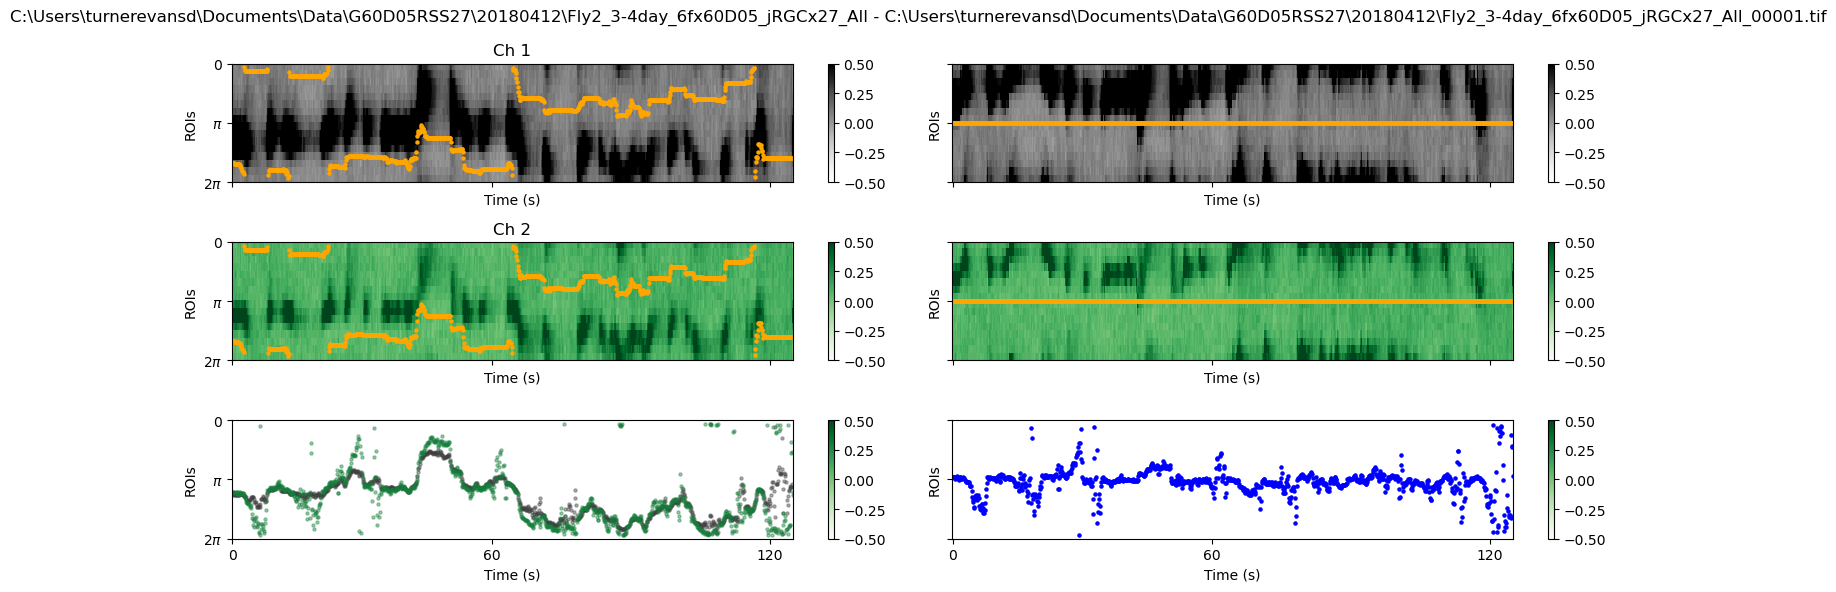

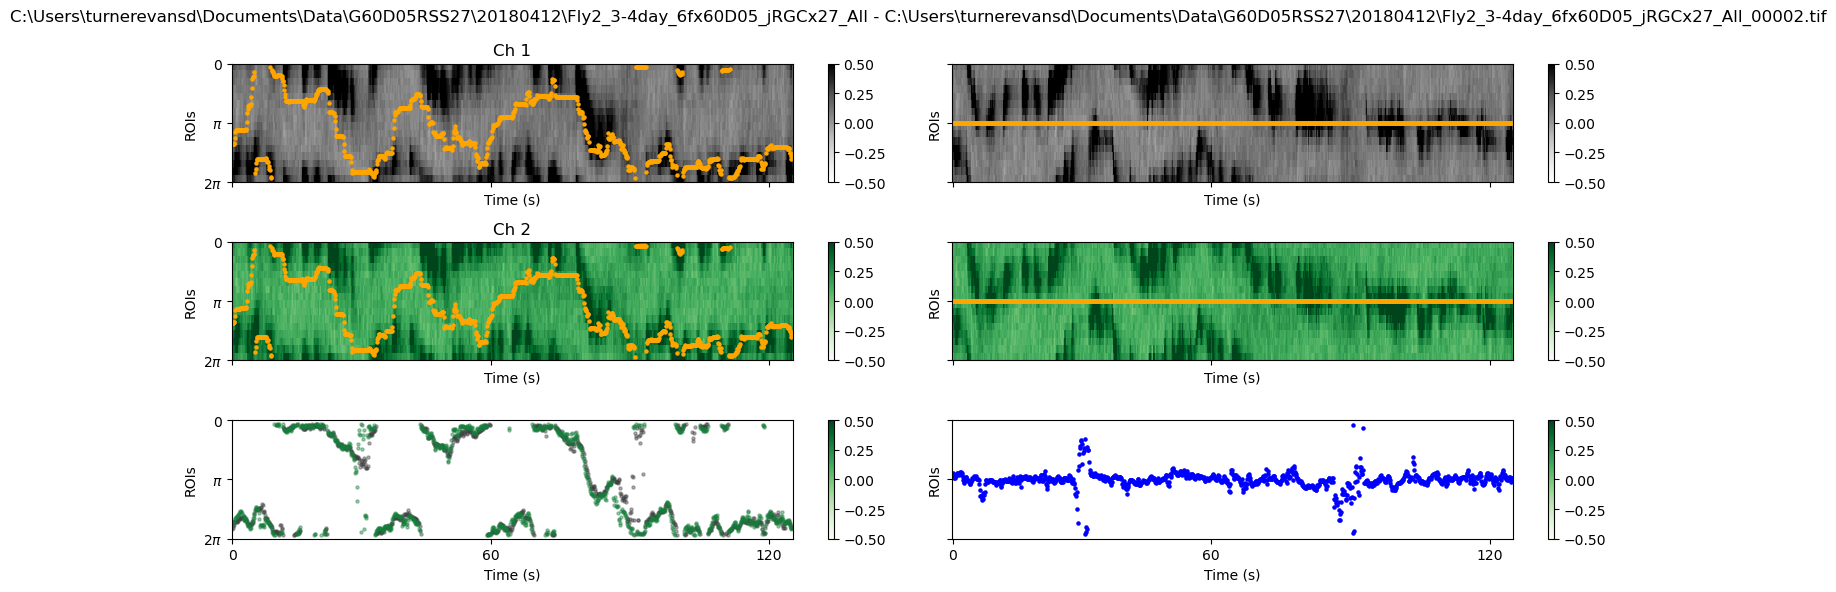

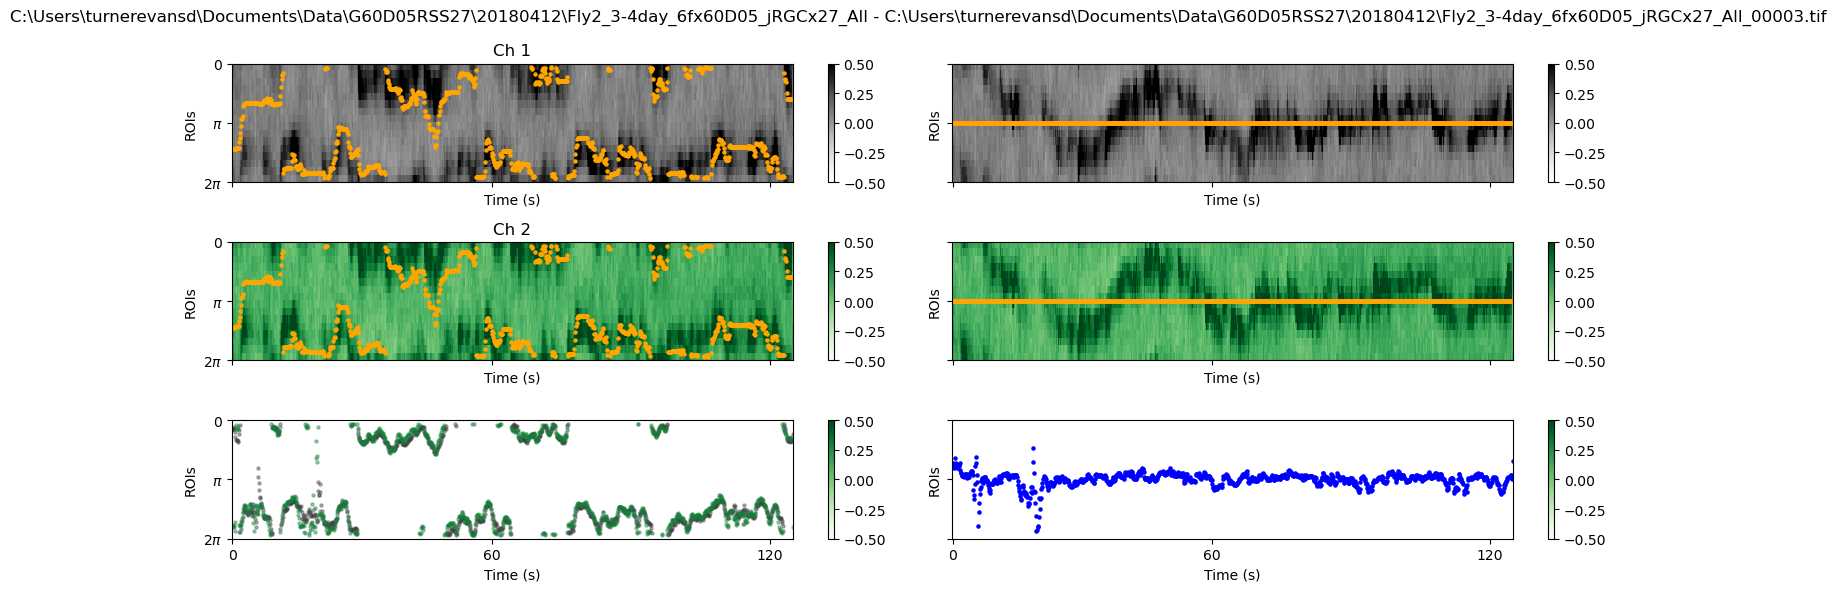

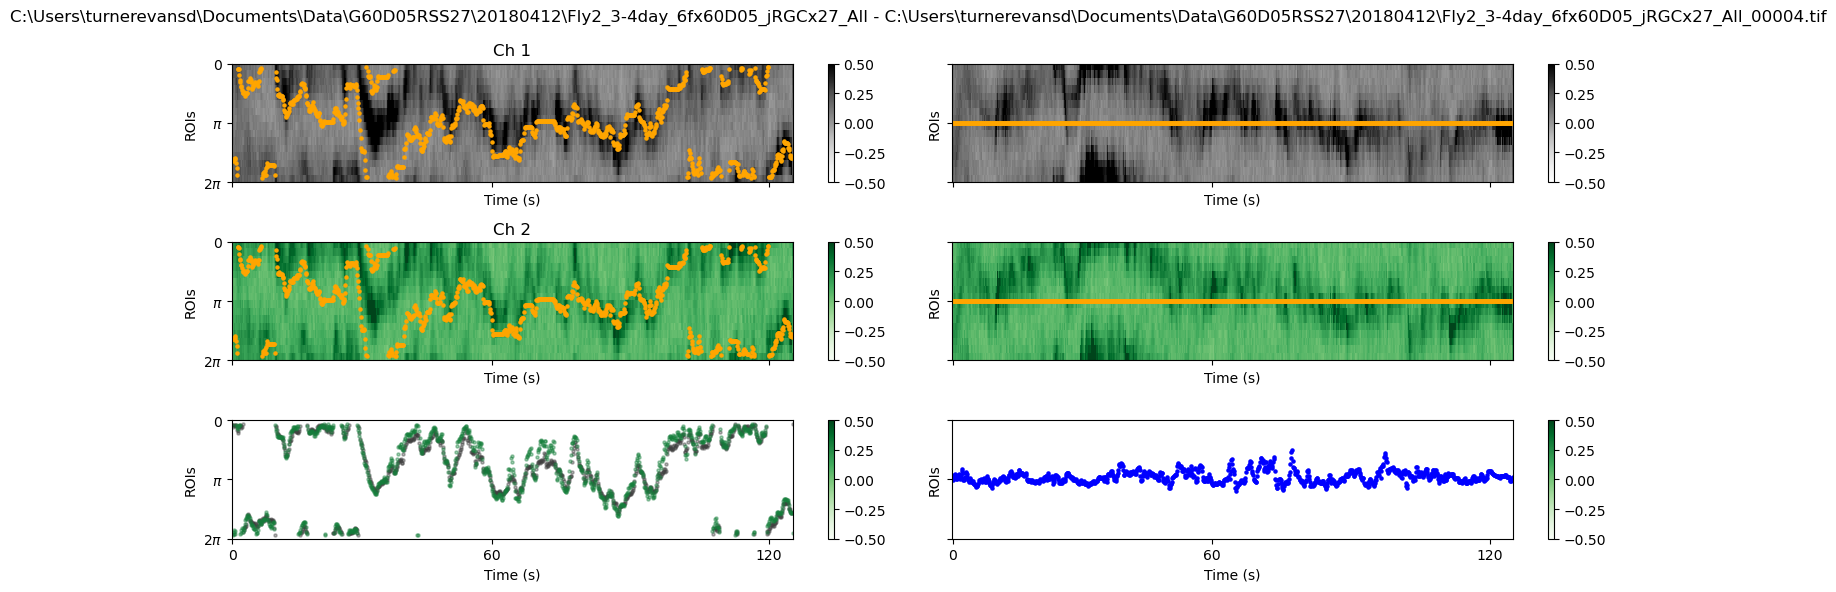

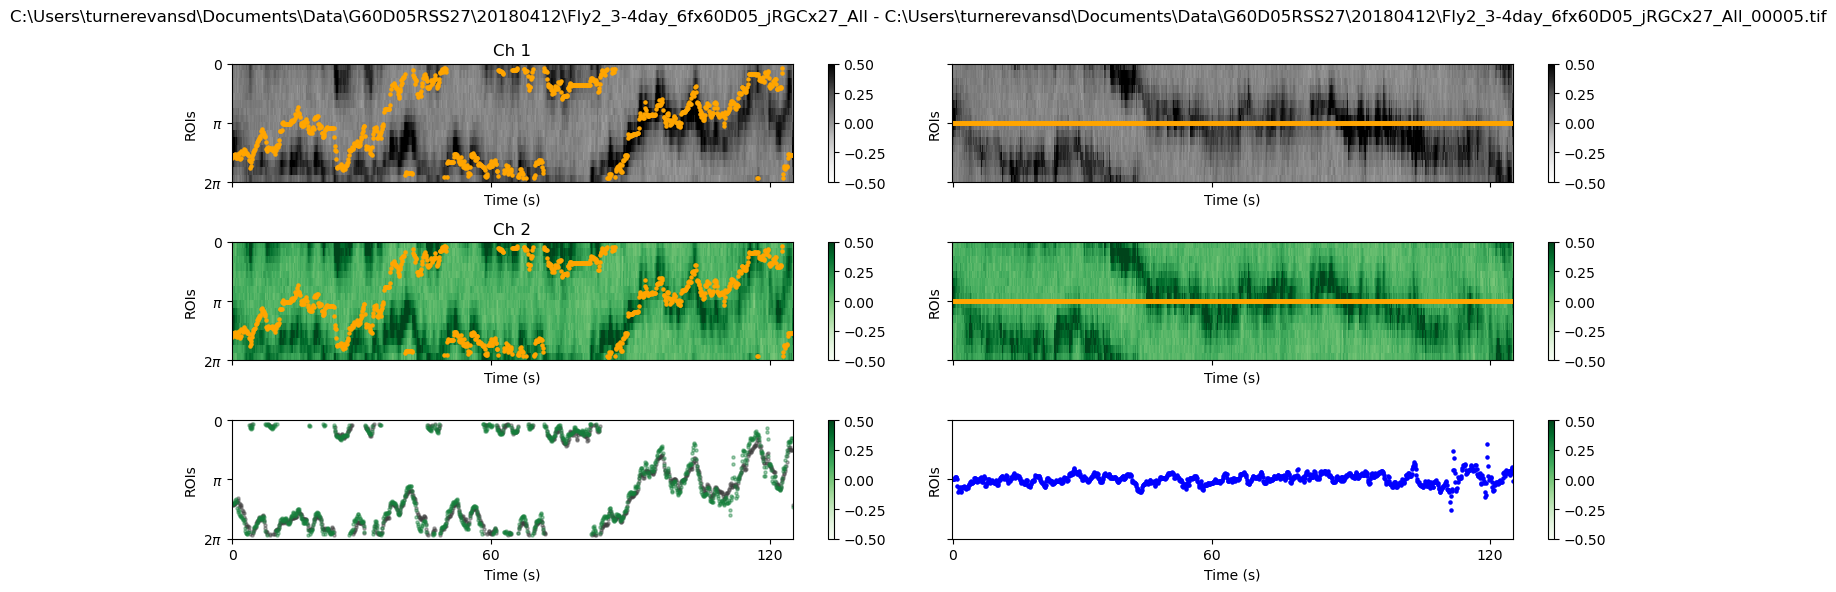

In [8]:
f = flydirs[2]
trial_names = [k for k in data[f].keys()]

for trial in trial_names:
    ts = nmp.session.GetTS_DTE(data[f][trial], channel_lookup[f])
    fig, ax = nmp.dual_imaging.plot_sess_heatmaps(ts, f, trial,
                                                  vmin=-.5, vmax=.5)
    

In [9]:
dh_bins = np.linspace(-np.pi, np.pi, num=11)
stats_df = nmp.dual_imaging.rho_stats_DTE(data, channel_lookup, dh_bins, abs=False)

grouped_rho1 = stats_df.groupby(['fly_id','cl'])['rho1_dig'].apply(lambda x: np.nanmean(np.stack(x),axis=0)).reset_index()
grouped_rho2 = stats_df.groupby(['fly_id','cl'])['rho2_dig'].apply(lambda x: np.nanmean(np.stack(x),axis=0)).reset_index()
grouped_rho1.head()

grouped_pvd = stats_df.groupby(['fly_id', 'cl'])['pva_diff'].apply(lambda x: np.nanmean(np.stack(x),axis=0)).reset_index()


/home/mplitt/repos/NeuromodPlasticity/NeuromodPlasticity/dual_imaging.py:170: RuntimeWarning: Mean of empty slice.
  rho1_dig = np.array([ts.rho[0, dh_dig == i].mean() for i in range(len(dh_bins))])
/home/mplitt/mambaforge/envs/NeuroModPlasticity/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/mplitt/repos/NeuromodPlasticity/NeuromodPlasticity/dual_imaging.py:173: RuntimeWarning: Mean of empty slice.
  rho2_dig = np.array([ts.rho[1, dh_dig == i].mean() for i in range(len(dh_bins))])
/home/mplitt/repos/NeuromodPlasticity/NeuromodPlasticity/dual_imaging.py:180: RuntimeWarning: Mean of empty slice.
  pva_diff = np.array([pvd[dh_dig==i].mean() for i in range(len(dh_bins))])
/tmp/ipykernel_330475/3162942249.py:4: RuntimeWarning: Mean of empty slice
  grouped_rho1 = stats_df.groupby(['fly_id','cl'])['rho1_dig'].apply(lambda x: np.nanmean(np.stack(x),axis=0)).reset_index()
/tmp/ipyke

Text(0.5, 0, 'rot. speed (rad/s)')

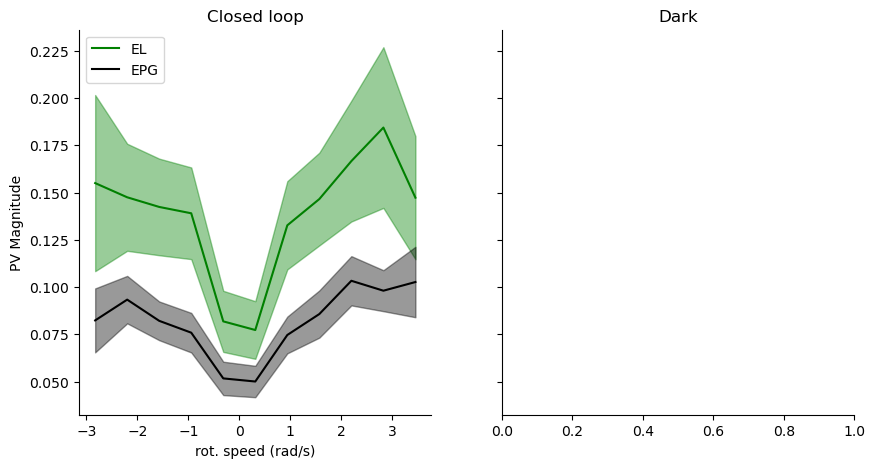

In [10]:
dh_bin_centers = dh_bins+np.diff(dh_bins)[0]/2

fig,ax = plt.subplots(1,2,sharey=True, figsize=[10,5])

rho1_dig = np.stack(grouped_rho1.loc[grouped_rho1['cl']==1,'rho1_dig'])
mu, sem = np.nanmean(rho1_dig, axis=0), sp.stats.sem(rho1_dig, axis=0, nan_policy='omit')
ax[0].plot(dh_bin_centers, mu, color='green', label='EL')
ax[0].fill_between(dh_bin_centers, mu-sem, mu+sem, color='green', alpha=.4)

rho2_dig = np.stack(grouped_rho2.loc[grouped_rho2['cl']==1,'rho2_dig'])
mu, sem = np.nanmean(rho2_dig, axis=0), sp.stats.sem(rho2_dig, axis=0, nan_policy='omit')
ax[0].plot(dh_bin_centers, mu, color='black', label='EPG')
ax[0].fill_between(dh_bin_centers, mu-sem, mu+sem, color='black', alpha=.4)



ax[0].legend()


for _ax in ax:
    _ax.spines['top'].set_visible(False)
    _ax.spines['right'].set_visible(False)

ax[0].set_title('Closed loop')
ax[1].set_title('Dark')
ax[0].set_ylabel('PV Magnitude')
ax[0].set_xlabel('rot. speed (rad/s)')

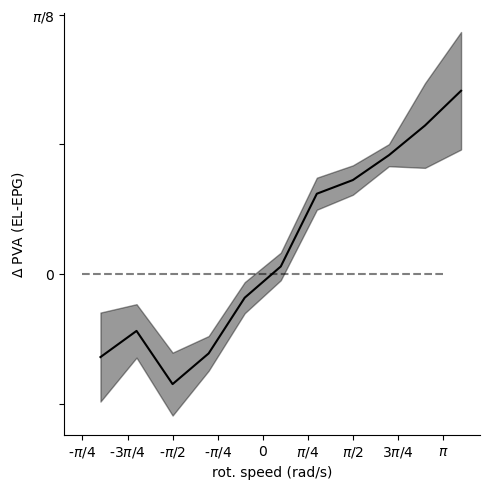

In [11]:
fig,ax = plt.subplots(sharey=True, figsize=[5,5])
dh_bin_centers_deg = dh_bin_centers*180/np.pi
pvd_dig = np.stack(grouped_pvd.loc[grouped_pvd['cl']==1,'pva_diff'])
mu, sem = np.nanmean(pvd_dig, axis=0), sp.stats.sem(pvd_dig, axis=0, nan_policy='omit')
ax.plot(dh_bin_centers, mu, color='black')
ax.fill_between(dh_bin_centers, mu-sem, mu+sem, color='black', alpha=.4)

_ = ax.set_yticks([-np.pi/4,-3*np.pi/16, -np.pi/8, -np.pi/16, 0, np.pi/16, np.pi/8, 3*np.pi/16, np.pi/4], 
                  labels=[  r"-$\pi$/4", "", r"-$\pi$/8", "", 0, "", r"$\pi$/8", "", r"$\pi$/4"])

_ = ax.set_xticks([-np.pi,-3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi], 
                  labels=[  r"-$\pi$/4", r"-3$\pi$/4", r"-$\pi$/2", r"-$\pi$/4", 0, r"$\pi$/4", r"$\pi$/2", r"3$\pi$/4", r"$\pi$"])



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.set_ylabel(r'$\Delta$ PVA (EL-EPG)')
ax.set_xlabel('rot. speed (rad/s)')
ax.plot([-np.pi,np.pi], [0,0], 'k--', alpha=.5, zorder=-1)

fig.tight_layout()

In [31]:
def shift_by_max(arr, sortby_index):

    for t in range(arr.shape[-1]):
        max_index = np.argmax(arr[sortby_index, :, t])
        arr[:, :, t] = np.roll(arr[:, :, t], -max_index+8, axis=1)
    return arr

l_turn_arr, r_turn_arr = [], []
dh_min, dh_max = 150/180*np.pi, 350/180*np.pi
for fly, multitrial_dict in data.items():
        for trial_name, trial_dict in multitrial_dict.items():
            ts = nmp.session.GetTS_DTE(trial_dict, channel_lookup[fly], dh_sigma=.3)
        
       

            l_turn_mask = np.logical_and(ts.dh > dh_min, ts.dh < dh_max)
            r_turn_mask = np.logical_and(ts.dh < -dh_min, ts.dh > -dh_max)

            
            

            if l_turn_mask.sum() > 0:
                l_turns = shift_by_max(ts.dff[:,:,l_turn_mask], 1).mean(axis=-1)
                l_turn_arr.append(l_turns)

            if r_turn_mask.sum() > 0:
                r_turns = shift_by_max(ts.dff[:,:,r_turn_mask], 1).mean(axis=-1)
                r_turn_arr.append(r_turns)
    
l_turn_arr = np.array(l_turn_arr)
print(l_turn_arr.shape)
lmin, lmax = np.amin(l_turn_arr, axis=-1, keepdims=True), np.amax(l_turn_arr, axis=-1, keepdims=True)
l_turn_arr = (l_turn_arr-lmin)/(lmax-lmin)
r_turn_arr = np.array(r_turn_arr)
rmin, rmax = np.amin(r_turn_arr, axis=-1, keepdims=True), np.amax(r_turn_arr, axis=-1, keepdims=True)
r_turn_arr = (r_turn_arr-rmin)/(rmax-rmin)


(12, 2, 16)


[0.08711233 0.27128551] [10.55234587]
[0.45743515 0.43583385] [-1.23766339]


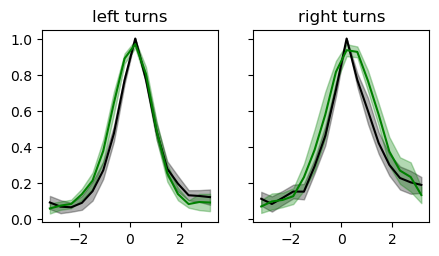

In [32]:
fig, ax = plt.subplots(1,2, figsize=[5,2.5], sharey=True)

phases = np.linspace(-np.pi, np.pi, num=l_turn_arr.shape[-1])
mu, sem = l_turn_arr.mean(axis=0), sp.stats.sem(l_turn_arr, axis=0)
x,y = st2p.utilities.pol2cart(mu, phases[np.newaxis,:])
pva = np.angle(x.mean(axis=-1)+1j*y.mean(axis=-1))
ax[0].plot(phases, mu[1,:], color='k')
ax[0].fill_between(phases, mu[1,:]-sem[1,:], mu[1,:]+sem[1,:], color='k', alpha=.3)
ax[0].plot(phases, mu[0,:], color='green')
ax[0].fill_between(phases, mu[0,:]-sem[0,:], mu[0,:]+sem[0,:], color='green', alpha=.3)
ax[0].set_title('left turns')
print(pva, np.diff(pva)*180/np.pi)


mu, sem = r_turn_arr.mean(axis=0), sp.stats.sem(r_turn_arr, axis=0)
x,y = st2p.utilities.pol2cart(mu, phases[np.newaxis,:])
pva = np.angle(x.mean(axis=-1)+1j*y.mean(axis=-1))
ax[1].plot(phases, mu[1,:], color='k')
ax[1].fill_between(phases, mu[1,:]-sem[1,:], mu[1,:]+sem[1,:], color='k', alpha=.3)
ax[1].plot(phases, mu[0,:], color='green')
ax[1].fill_between(phases, mu[0,:]-sem[0,:], mu[0,:]+sem[0,:], color='green', alpha=.3)
ax[1].set_title('right turns')
print(pva, np.diff(pva)*180/np.pi)